# Project: Wrangling and Analyze Data

# Table of Contents

1. [Data Gathering](#gather)
2. [Assessing Data](#assess)
3. [Cleaning Data](#clean)
4. [Storing Data](#store)
5. [Analyzing and Visualizing Data](#analyze)

## Data Gathering
<a id="gather"></a>
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
archive = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open("image_predictions.tsv", "wb") as f:
    f.write(r.content)

In [5]:
image_predictions = pd.read_csv('image_predictions.tsv', sep = '\t')

In [6]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1924,857263160327368704,https://pbs.twimg.com/media/C-WcS4MXoAADrBU.jpg,1,Samoyed,0.998021,True,Pomeranian,0.000922,True,keeshond,0.000311,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
1807,832397543355072512,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,1,Pekinese,0.988916,True,Brabancon_griffon,0.001677,True,Siamese_cat,0.001126,False
1793,831262627380748289,https://pbs.twimg.com/media/C4k88lGVMAEKNzb.jpg,1,cocker_spaniel,0.263323,True,Brittany_spaniel,0.200550,True,doormat,0.193414,False
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
consumer_key ='CONSUMER_KEY'
consumer_secret = 'CONSUMER_SECRET'
access_token = 'ACCESS_TOKEN'
access_token_secret = 'ACCESS_TOKEN_SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
#Retrieve the tweet ids
tweet_id = archive['tweet_id']
#create an empty list for the tweets
tweet_list = []

In [26]:
for id in tweet_id:
    #get the tweet retweets and likes corresponding to the id
    try:
        tweet = api.get_status(id, tweet_mode = 'extended')
        retweets = tweet['retweet_count']
        likes = tweet['favorite_count']
        #Append to the list
        tweet_list.append({'tweet_id': id, 'retweets':retweets, 'likes':likes})
    except Exception as e:
        print(f'Twitter ID {id} Failed')

Twitter ID 888202515573088257 Failed
Twitter ID 873697596434513921 Failed
Twitter ID 872668790621863937 Failed
Twitter ID 872261713294495745 Failed
Twitter ID 869988702071779329 Failed
Twitter ID 866816280283807744 Failed
Twitter ID 861769973181624320 Failed
Twitter ID 856602993587888130 Failed
Twitter ID 856330835276025856 Failed
Twitter ID 851953902622658560 Failed
Twitter ID 851861385021730816 Failed
Twitter ID 845459076796616705 Failed
Twitter ID 844704788403113984 Failed
Twitter ID 842892208864923648 Failed
Twitter ID 837366284874571778 Failed
Twitter ID 837012587749474308 Failed
Twitter ID 829374341691346946 Failed
Twitter ID 827228250799742977 Failed
Twitter ID 812747805718642688 Failed
Twitter ID 802247111496568832 Failed
Twitter ID 779123168116150273 Failed
Twitter ID 775096608509886464 Failed
Rate limit reached. Sleeping for: 359
Twitter ID 771004394259247104 Failed
Twitter ID 770743923962707968 Failed
Twitter ID 766864461642756096 Failed
Twitter ID 759923798737051648 Failed


In [27]:
#Convert to a dataframe
tweets_count = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweets', 'likes'])
tweets_count.to_csv('tweet_json.csv', encoding = 'utf-8')

In [7]:
tweets_count = pd.read_csv('tweet_json.csv')

In [8]:
tweets_count

,Unnamed: 0,tweet_id,retweets,likes
0,0,892420643555336193,7009,33812
1,1,892177421306343426,5301,29330
2,2,891815181378084864,3481,22050
3,3,891689557279858688,7225,36937
4,4,891327558926688256,7760,35310
5,5,891087950875897856,2602,17812
6,6,890971913173991426,1663,10363
7,7,890729181411237888,15752,56861
8,8,890609185150312448,3620,24524
9,9,890240255349198849,6098,27959


## Assessing Data
<a id="assess"></a>

### Assess the dataframes visually

In [9]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1014,747204161125646336,NaN,NaN,2016-06-26 23:05:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He's deadly af. Clearly part sh...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747204161...,10,10,Clark,None,None,None,None
843,766714921925144576,7.667118e+17,4.196984e+09,2016-08-19 19:14:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",His name is Charley and he already has a new s...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,None,None,None,None
2288,667176164155375616,NaN,NaN,2015-11-19 03:02:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are strange dogs. All have toupees. Long...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667176164...,4,10,None,None,None,None,None
472,816450570814898180,NaN,NaN,2017-01-04 01:05:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Moose. He doesn't want his friend to go b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/816450570...,13,10,Moose,None,None,None,None


In [10]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
354,672591762242805761,https://pbs.twimg.com/media/CVWGotpXAAMRfGq.jpg,1,kuvasz,0.777659,True,Great_Pyrenees,0.112517,True,golden_retriever,0.038351,True
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,chow,0.526230,True,Pomeranian,0.283647,True,toy_poodle,0.067665,True
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True
1087,718939241951195136,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,1,Pembroke,0.766327,True,Cardigan,0.222126,True,toilet_tissue,0.006757,False
1086,718631497683582976,https://pbs.twimg.com/media/CfkXiX6W4AAmICF.jpg,1,Pomeranian,0.993718,True,Pekinese,0.003611,True,Persian_cat,0.000525,False


In [11]:
tweets_count = tweets_count.drop('Unnamed: 0', axis=1)

In [12]:
tweets_count.sample(5)

,tweet_id,retweets,likes
2246,667453023279554560,74,279
182,855851453814013952,16140,41915
9,890240255349198849,6098,27959
1431,695064344191721472,530,1481
1515,689557536375177216,405,1906


### Assess the dataframe programmatically

In [13]:
#assess the archive dataframe
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#assess the image predictions dataframe
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
#assess the tweets count dataframe
tweets_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id    2327 non-null int64
retweets    2327 non-null int64
likes       2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [16]:
archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [17]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [18]:
tweets_count.describe()

,tweet_id,retweets,likes
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2471.020627,7053.946283
std,6.820795e+16,4184.805285,10961.969691
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,494.500000,1225.000000
50%,7.178418e+17,1148.000000,3051.000000
75%,7.986547e+17,2860.500000,8604.000000
max,8.924206e+17,70733.000000,144877.000000


### Quality issues
1. Image_predictions table: Some column names are not descriptive

2. Image_predictions table: Some items in the P1 column are separated with underscores

3. All tables: Tweet ID datatypes should be string

4. Archive table: Missing values in in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id (cannot be cleaned/not needed)

5. Archive table: Missing values in expanded urls column (cannot be cleaned)

6. Archive table: Missing values in retweeted status time stamp (not to be cleaned)

7. Image_prediction: img_num should be string datatype instead of int

8. Doggo, Floofer, Pupper and Puppo datatypes should be category instead of object

9. Archive table: The minimum rating_denominator seems wrong. Zero values

10. Archive table: Carry out some cleaning to find the source of the tweet

### Tidiness issues
1. Archive table: Doggo, Floofer, Pupper and Puppo should be one column

2. Tweets_count should be part of the Archive table

## Cleaning Data
<a id="clean"></a>

In [33]:
# Make copies of original pieces of data
archive_clean = archive.copy()
image_predictions_clean = image_predictions.copy()
tweets_count_clean = tweets_count.copy()

### Issue #1: Image_predictions table: Some column names are not descriptive

#### Define: Rename the columns with more descriptive names using pandas rename() 

#### Code

In [34]:
image_predictions.sample()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1514,786664955043049472,https://pbs.twimg.com/media/CurLmoqXgAEPoJ-.jpg,1,Leonberg,0.512034,True,keeshond,0.464816,True,Pomeranian,0.007812,True


In [35]:
#Rename the columns
image_predictions_clean.rename(columns = {'p1':'first_prediction', 
                                         'p1_conf':'confidence_1',
                                        'p1_dog':'is_dog_1',
                                        'p2':'second_prediction', 
                                         'p2_conf':'confidence_2',
                                        'p2_dog':'is_dog_2',
                                        'p3':'third_prediction', 
                                         'p3_conf':'confidence_3',
                                        'p3_dog':'is_dog_3'}, inplace=True)

#### Test

In [36]:
image_predictions_clean.sample()

,tweet_id,jpg_url,img_num,first_prediction,confidence_1,is_dog_1,second_prediction,confidence_2,is_dog_2,third_prediction,confidence_3,is_dog_3
773,689599056876867584,https://pbs.twimg.com/media/CZHyrvOXEAEin-A.jpg,1,dogsled,0.426494,False,cocker_spaniel,0.073101,True,Chihuahua,0.070323,True


### Issue #2: Image_predictions table: Some items in the P1, P2 and P3 columns are separated with underscores

#### Define: Replace the underscores in the P1, P2, P3 columns with spaces using the pandas replace() function and capitalize using upper

#### Code

In [37]:
#Replace underscores with spaces and capitalize
image_predictions_clean.first_prediction = image_predictions_clean.first_prediction.str.replace('_', " ").str.capitalize()
image_predictions_clean.second_prediction = image_predictions_clean.second_prediction.str.replace('_', " ").str.capitalize()
image_predictions_clean.third_prediction = image_predictions_clean.third_prediction.str.replace('_', " ").str.capitalize()

#### Test

In [38]:
image_predictions_clean.sample(5)

,tweet_id,jpg_url,img_num,first_prediction,confidence_1,is_dog_1,second_prediction,confidence_2,is_dog_2,third_prediction,confidence_3,is_dog_3
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,Pug,0.272205,True,Bull mastiff,0.251530,True,Bath towel,0.116806,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,Cash machine,0.802333,False,Schipperke,0.045519,True,German shepherd,0.023353,True
1247,747600769478692864,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,1,Chesapeake bay retriever,0.804363,True,Weimaraner,0.054431,True,Labrador retriever,0.043268,True
1922,856543823941562368,https://pbs.twimg.com/media/C-MOEDCXYAEjp7o.jpg,1,Boston bull,0.306910,True,Siamese cat,0.191218,False,Chihuahua,0.189288,True
287,671154572044468225,https://pbs.twimg.com/media/CVBrhXoWIAAox_C.jpg,1,Labrador retriever,0.495047,True,Chesapeake bay retriever,0.350188,True,Golden retriever,0.142400,True


### Issue #3: All tables: tweet_id datatype should be string

#### Define: Convert tweet_id on all tables from integer to string using pandas astype() function

#### Code

In [91]:
#Convert the tweet_id on all tables to strings
archive_clean.tweet_id = archive_clean.tweet_id.astype('str')
image_predictions_clean.tweet_id = image_predictions_clean.tweet_id.astype('str')
tweets_count_clean.tweet_id = tweets_count_clean.tweet_id.astype('str')

#### Test

In [40]:
print(f' for archive table, dtype is {archive_clean.tweet_id.dtypes}\nfor image_prediction table, dtype is {image_predictions_clean.tweet_id.dtypes}\nfor tweets_count table, dtype is {tweets_count_clean.tweet_id.dtypes}')

 for archive table, dtype is object
for image_prediction table, dtype is object
for tweets_count table, dtype is object


### Issue #4: Image_predictions table: Img num should be strings instead of integers

#### Define: Convert the img_num datatype to string using pandas astype() function

#### Code

In [41]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id             2075 non-null object
jpg_url              2075 non-null object
img_num              2075 non-null int64
first_prediction     2075 non-null object
confidence_1         2075 non-null float64
is_dog_1             2075 non-null bool
second_prediction    2075 non-null object
confidence_2         2075 non-null float64
is_dog_2             2075 non-null bool
third_prediction     2075 non-null object
confidence_3         2075 non-null float64
is_dog_3             2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [42]:
image_predictions_clean.img_num = image_predictions_clean.img_num.astype('str')

#### Test

In [43]:
image_predictions_clean.img_num.dtypes

dtype('O')

### Issue #5: Archive table: Doggo, Floofer, Pupper and Puppo should be one column
#### Also remove columns having more than optimal missing values

#### Define: Use the pandas drop() function to remove the columns with lots of missing values and pandas melt() function to merge the dog stages together

#### Code

In [65]:
archive_clean = archive.copy()
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [66]:
#First select only rows that are not retweets
archive_clean = archive_clean[archive_clean.retweeted_status_user_id.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_timestamp.isnull()]
archive_clean = archive_clean[archive_clean.retweeted_status_id.isnull()]

In [67]:
#First, drop all the rows that we would not be using
archive_clean = archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [68]:
#Use the melted function to merge four columns into one
archive_clean = pd.melt(archive_clean, id_vars=['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'rating_numerator', 'rating_denominator',
                                  'name'], var_name = 'dog_stages', value_name="stage")
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8700 entries, 0 to 8699
Data columns (total 10 columns):
tweet_id              8700 non-null int64
timestamp             8700 non-null object
source                8700 non-null object
text                  8700 non-null object
expanded_urls         8468 non-null object
rating_numerator      8700 non-null int64
rating_denominator    8700 non-null int64
name                  8700 non-null object
dog_stages            8700 non-null object
stage                 8700 non-null object
dtypes: int64(3), object(7)
memory usage: 679.8+ KB


In [69]:
archive_clean.sort_values('stage').head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,doggo,None
5790,684959798585110529,2016-01-07 04:48:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,pupper,None
5789,684969860808454144,2016-01-07 05:28:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...","For those who claim this is a goat, u are wron...",NaN,5,10,None,pupper,None
5787,685198997565345792,2016-01-07 20:39:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. That is his time machine. He's ...,https://twitter.com/dog_rates/status/685198997...,11,10,Alfie,pupper,None
5785,685307451701334016,2016-01-08 03:50:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Petrick. He's an Altostratus Floo...,https://twitter.com/dog_rates/status/685307451...,11,10,Petrick,pupper,None


In [70]:
#It looks like there are lots of duplicates. Remove the duplicates
archive_clean = archive_clean.sort_values('stage').drop_duplicates('tweet_id', keep ='last')

In [71]:
archive_clean.sample()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,stage
4038,671538301157904385,2015-12-01 03:56:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Baxter. He's very calm. Hasn't eaten i...,https://twitter.com/dog_rates/status/671538301...,8,10,Baxter,floofer,None


#### Test

In [72]:
archive_clean.dog_stages.value_counts()

floofer    1633
doggo       282
pupper      234
puppo        26
Name: dog_stages, dtype: int64

### Issue #6: Archive table: Denominator values that are equal to zero

#### Define: Replace the zero denominator value with the mode value

#### Code

In [73]:
#Find the mode denominator
archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [74]:
archive_clean[archive_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,stage
2438,835246439529840640,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,floofer,None


In [75]:
archive_clean.rating_denominator = archive_clean.rating_denominator.replace(0, 10)

#### Test

In [76]:
archive_clean[archive_clean.rating_denominator == 0]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,stage


### Issue #7: Archive table: Carry out some cleaning to find the source of the tweet

#### Define: Use the extract function with regular expressions to extract the source of the tweet

#### Code

In [77]:
#View the full length of the field content
archive_clean.source[1]

'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'

In [78]:
archive_clean['phone'] = archive_clean.source.str.extract(r'>(.+)<')

#### Test

In [79]:
archive_clean['phone'].sample(5)

2690    Twitter for iPhone
3499    Twitter for iPhone
2687    Twitter for iPhone
2114    Twitter for iPhone
3385    Twitter for iPhone
Name: phone, dtype: object

### Issue #8: Combine the tables and remove unnecessary columns

#### Define: Convert the None to NaN in the Stage column and Use the pandas merge() function to combine the tables with the tweet_id

#### Code

In [87]:
#Firstly, convert the None to NaN
archive_clean.stage = archive_clean.stage.replace('None', np.NaN)

In [88]:
archive_clean.stage = archive_clean.stage.replace("", np.NaN)

In [89]:
archive_clean.stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: stage, dtype: int64

In [92]:
combi = pd.merge(pd.merge(archive_clean, image_predictions_clean, on='tweet_id', how='left'), tweets_count_clean, on='tweet_id', how='left')

In [93]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 24 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
dog_stages            2175 non-null object
stage                 344 non-null object
phone                 2175 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null object
first_prediction      1994 non-null object
confidence_1          1994 non-null float64
is_dog_1              1994 non-null object
second_prediction     1994 non-null object
confidence_2          1994 non-null float64
is_dog_2              1994 non-null object
third_prediction      1994 non-null object
confidence_3          1994 non-nul

In [94]:
combi.rating_numerator[1]

11

In [95]:
combi = combi.drop(['source', 'expanded_urls', 'img_num', 'jpg_url'], axis=1)

In [96]:
combi.sample()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,stage,phone,first_prediction,confidence_1,is_dog_1,second_prediction,confidence_2,is_dog_2,third_prediction,confidence_3,is_dog_3,retweets,likes
1373,846042936437604353,2017-03-26 16:55:29 +0000,Meet Jarvis. The snow pupsets him. Officially ...,12,10,Jarvis,floofer,NaN,Twitter for iPhone,Golden retriever,0.96111,True,Labrador retriever,0.016695,True,Tibetan mastiff,0.009082,True,2593.0,14834.0


## Storing Data
<a id="store"></a>
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [97]:
combi.to_csv('twitter_archive_master.csv', index=False, encoding='utf-8')

## Analyzing and Visualizing Data
<a id="analyze"></a>
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [98]:
combi.phone.value_counts()

Twitter for iPhone     2042
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: phone, dtype: int64

In [99]:
combi.stage.value_counts()

pupper     234
doggo       75
puppo       25
floofer     10
Name: stage, dtype: int64

In [100]:
top_10_dogs = combi.first_prediction.value_counts().head(10)

In [101]:
combi.second_prediction.value_counts().head(10)

Labrador retriever          96
Golden retriever            82
Cardigan                    73
Chihuahua                   43
Chesapeake bay retriever    40
French bulldog              39
Pomeranian                  39
Toy poodle                  36
Siberian husky              33
Cocker spaniel              32
Name: second_prediction, dtype: int64

In [102]:
combi[combi.likes == combi.likes.max()]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_stages,stage,phone,first_prediction,confidence_1,is_dog_1,second_prediction,confidence_2,is_dog_2,third_prediction,confidence_3,is_dog_3,retweets,likes
1876,744234799360020481,2016-06-18 18:26:18 +0000,Here's a doggo realizing you can stand in a po...,13,10,None,doggo,doggo,Twitter for iPhone,Labrador retriever,0.825333,True,Ice bear,0.044681,False,Whippet,0.018442,True,70733.0,144877.0


In [103]:
#Get the values for the maximum retweets and likes
print(f'The maximum retweets is \033[1m{combi.retweets.max()}\033[0m and the maximum number of likes is \033[1m{combi.likes.max()}\033[0m')

The maximum retweets is 70733.0 and the maximum number of likes is 144877.0


### Insights:
1. The most popular dogs, according to first and second predictions are the Golden Retriever and the Labrador Retriever

2. The maximum retweets and maximum likes were given to the tweet with tweet ID: 744234799360020481

3. Twitter for iPhone is by far the most common source of tweets

### Visualization

Text(0,0.5,'Dog breeds')

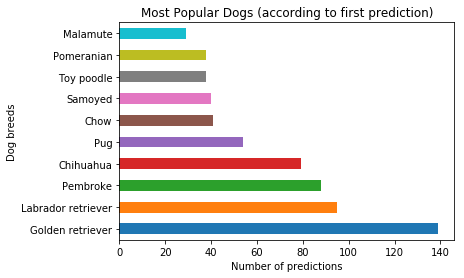

In [104]:
top_10_dogs.plot(kind="barh")
plt.title("Most Popular Dogs (according to first prediction)")
plt.xlabel("Number of predictions")
plt.ylabel("Dog breeds")